# Clustering with K-Means

In [144]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import locale
locale.setlocale(locale.LC_TIME, "id_ID")

'id_ID'

## Load Post Processing Data


In [127]:
# load from data

files_categories = {
    'Kasus Harian' :  'Kasus Harian_post_processing.csv',
    'Kasus Aktif' :  'Kasus Aktif_post_processing.csv',
    'Sembuh Harian' :  'Sembuh Harian_post_processing.csv',
    'Sembuh' :  'Sembuh Harian_post_processing.csv',
    'Meninggal Dunia Harian' :  'Meninggal Dunia Harian_post_processing.csv',
    'Meninggal Dunia' :  'Meninggal Dunia_post_processing.csv',
    'Total Case' :  'Total Case_post_processing.csv'
}

df_categories = {}
df_date_time = {}
for category in files_categories:
    # get the value
    csv_file_name = "../data/{}".format(files_categories[category])

    # load data
    df_categories[category] = pd.read_csv(csv_file_name)
    df_date_time[category] = df_categories[category].pop('Time')
    df_categories[category].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Aceh       357 non-null    int64
 1   Bali       357 non-null    int64
 2   Banten     357 non-null    int64
 3   Babel      357 non-null    int64
 4   Bengkulu   357 non-null    int64
 5   DIY        357 non-null    int64
 6   Jakarta    357 non-null    int64
 7   Jambi      357 non-null    int64
 8   Jabar      357 non-null    int64
 9   Jateng     357 non-null    int64
 10  Jatim      357 non-null    int64
 11  Kalbar     357 non-null    int64
 12  Kaltim     357 non-null    int64
 13  Kalteng    357 non-null    int64
 14  Kalsel     357 non-null    int64
 15  Kaltara    357 non-null    int64
 16  Kep Riau   357 non-null    int64
 17  NTB        357 non-null    int64
 18  Sumsel     357 non-null    int64
 19  Sumbar     357 non-null    int64
 20  Sulut      357 non-null    int64
 21  Sumut      357 n

## Feature Engineering
We want to make daily zone clustering using k-Means thus we decided to choose 2 feature cured daily rated and death daily rated for easier visualization.


$\ \text{daily cured rate} = \frac{\text{daily cured}}{\text{active case}} $

$\ \text{daily death rate} = \frac{\text{daily death}}{\text{active case}} $



In [114]:
# df_features = pd.DataFrame()
df_daily_cured_rate = df_categories['Sembuh Harian'].tail(1) / df_categories['Kasus Aktif'].tail(1)
df_daily_death_rate = df_categories['Meninggal Dunia Harian'].tail(1) / df_categories['Kasus Aktif'].tail(1)

In [115]:
#concat dataframe
frames = [df_daily_cured_rate,df_daily_death_rate]
df_features = pd.concat(frames)
df_features = df_features.reset_index()
del df_features['index']

In [116]:
# rename columns for clearer dataframe
df_features = df_features.rename(index={0 : 'daily_cured_rate' , 1 : 'daily_death_rate'})

#transpose df_features
df_features = df_features.transpose()

# normalization using min max scalar value-min/max-min
df_features = ( df_features - df_features.min() ) / ( df_features.max() - df_features.min() )

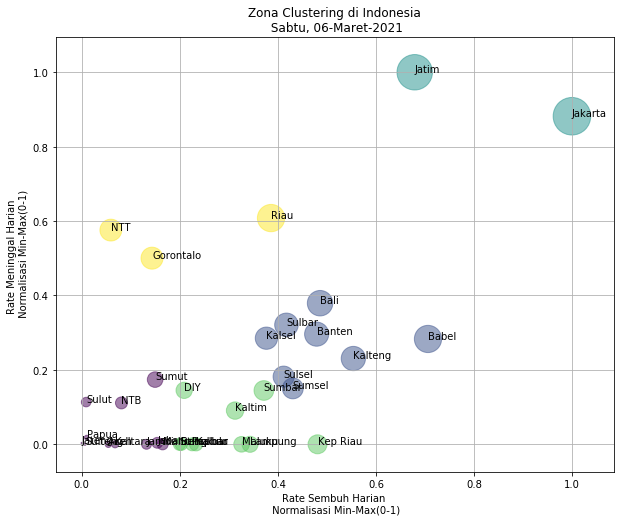

In [147]:
# predict
y_predicts = KMeans(n_clusters=5).fit_predict(df_features)


# set size for plot from mean of 2 columns
size_points = 10 * 150 * df_features.mean(axis=1)

# visualize
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
plt.scatter(df_features['daily_cured_rate'], df_features['daily_death_rate'], c=y_predicts, s=size_points, alpha=0.5)
ax.grid(True)

for index, rows in df_features.iterrows():
    plt.annotate(index, (rows[0],rows[1]))


# make legends class
# produce a legend with the unique colors from the scatter
#legend1 = ax.legend(*scatter.legend_elements(),
#                    loc="lower left", title="Classes")
#ax.add_artist(legend1)
latest_dt = pd.to_datetime(df_date_time['Kasus Aktif'].tail(1))
readable_datetime = latest_dt.dt.strftime('%A, %d-%B-%Y').values[0]
plt.title("Zona Clustering di Indonesia\n {}".format(readable_datetime))
plt.xlabel("Rate Sembuh Harian \n Normalisasi Min-Max(0-1)")
plt.ylabel("Rate Meninggal Harian \n Normalisasi Min-Max(0-1)")

plt.savefig('../images/{}_Semua_Provinsi.png'.format("K-Means_"), dpi=100, bbox_inches='tight')
plt.show()
